/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and wil

[]

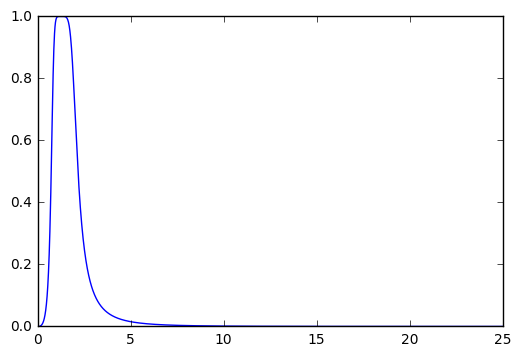

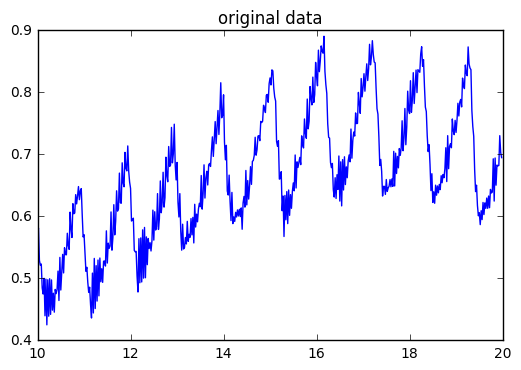

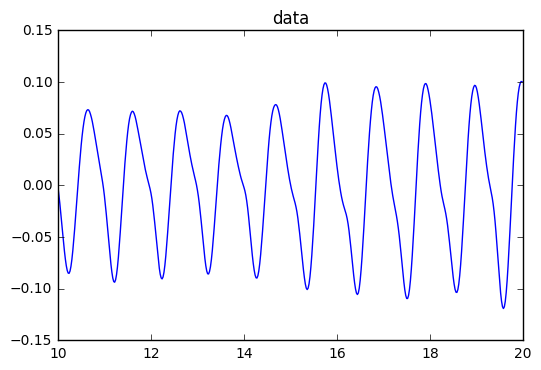

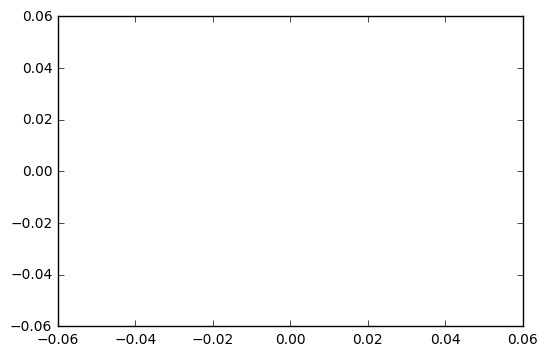

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.signal import firwin
from scipy.signal import freqz
from scipy.signal import find_peaks_cwt
from scipy.signal import butter, lfilter

%matplotlib inline
data = np.genfromtxt("takashin_Homework_sample.csv", dtype=float, delimiter=',', names=True)
timestamp = data['timesecond']
scaler = preprocessing.MinMaxScaler()
IR = scaler.fit_transform(data['IR'])
RED = scaler.fit_transform(data['RED'])

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band', analog = False, output = 'ba')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return b

fs = 50.0
lowcut = 0.8
highcut = 2
# lowcut = 0.15 for resp
# highcut = 0.34

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)
    
plt.figure()
y = butter_bandpass_filter(IR, lowcut, highcut, fs, order=2)
plt.plot(timestamp[500:1000], IR[500:1000], )
plt.title("original data")
plt.figure()
plt.plot(timestamp[500:1000], y[500:1000])
plt.title("data")
plt.figure()
plt.plot()

In [91]:
# def caculateHeartRate (data):
inputData = y
inputTime = timestamp
peakind = find_peaks_cwt(inputData, np.arange(5,10))
print "number of peak %d" % len(peakind)

def caculateHeartRate(timestamp, data, width, fs):
    peakind = find_peaks_cwt(inputData, width)
    numberOfPeak = len(peakind)
    print "number of peak %d" % numberOfPeak
    firstPeakTime = timestamp[peakind[0] - 1]
    lastPeakTime = timestamp[peakind[numberOfPeak - 1] - 1]
    timeInterval = lastPeakTime - firstPeakTime
    print "total timeInterval %f" % timeInterval
    averageDistance = timeInterval/(numberOfPeak - 1)
    print "average distance is %f" % averageDistance
    return 60 / averageDistance

print caculateHeartRate(inputTime, inputData,  np.arange(8,10), 50)

number of peak 85
number of peak 86
total timeInterval 88.800000
average distance is 1.044706
57.4324324324


([32], array([ 1.6]), array([ 0.9995736]))

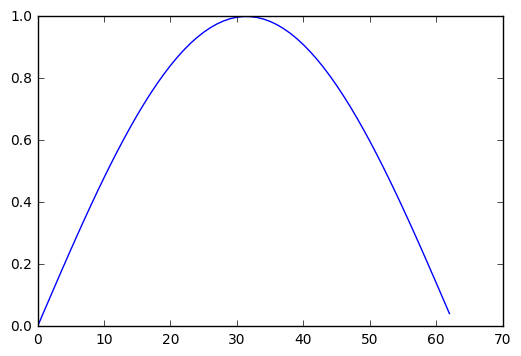

In [6]:
from scipy import signal
xs = np.arange(0, np.pi, 0.05)
data = np.sin(xs)
plt.plot(data)
peakind = signal.find_peaks_cwt(data, np.arange(1,10))
peakind, xs[peakind], data[peakind]

In [ ]:
def detect_peaks(dataset):
    window = []
    peaklist = []
    listpos = 0 
    for datapoint in dataset.hart:
        rollingmean = dataset.hart_rollingmean[listpos]
        if (datapoint < rollingmean) and (len(window) < 1):
            listpos += 1
        elif (datapoint > rollingmean):
            window.append(datapoint)
            listpos += 1
        else:
            maximum = max(window)
            beatposition = listpos - len(window) + (window.index(max(window)))
            peaklist.append(beatposition)
            window = []
            listpos += 1
    measures['peaklist'] = peaklist
    measures['ybeat'] = [dataset.hart[x] for x in peaklist]

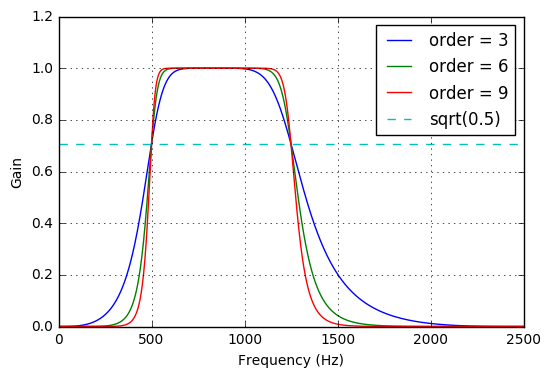

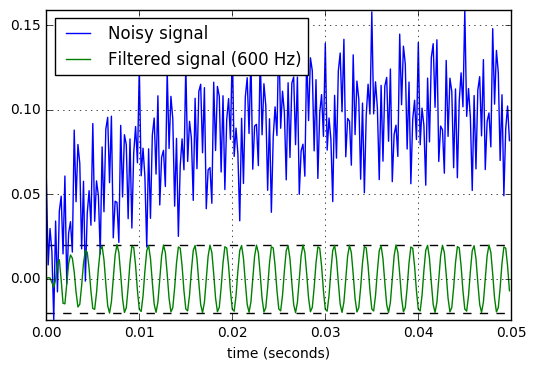

In [14]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = T * fs
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()

In [53]:
np.zeros(2,1)

TypeError: data type not understood